In [ ]:
import os
from torchvision import datasets, transforms

dataset_path = r'clasification-roi'

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'train'), transform=transform)

def display_dataset_dimensions(dataset):
    num_images = len(dataset)  # Total number of images
    num_classes = len(dataset.classes)  # Number of unique classes
    print("Dataset Dimension:")
    print(f"Total Images: {num_images}")
    print(f"Number of Classes: {num_classes}")
    print(f"Classes: {dataset.classes}")

# Display the dimensions of the dataset
display_dataset_dimensions(train_dataset)


Dataset Dimension:
Total Images: 20434
Number of Classes: 2
Classes: ['Benign', 'Malignant']


: 

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Define the transformation for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to PyTorch tensors
])

# Load the dataset
dataset = datasets.ImageFolder("clasification-roi", transform=transform)
class_names = dataset.classes

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

def display_random_images(data_loader, class_names, num_images=3):
    for class_index, class_name in enumerate(class_names):
        # Filter the dataset for the specific class
        images = []
        labels = []
        for img, label in dataset:
            if label == class_index:
                images.append(img)
                labels.append(label)
            if len(images) == num_images:
                break

        # Display the images
        plt.figure(figsize=(8, 4))
        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # Convert CHW to HWC
            plt.title(class_name)
            plt.axis('off')
        plt.show()

display_random_images(data_loader, class_names)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Set: Benign = 5559, Malignant = 14875
Test Set: Benign = 1938, Malignant = 4913
Validation Set: Benign = 408, Malignant = 1581


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


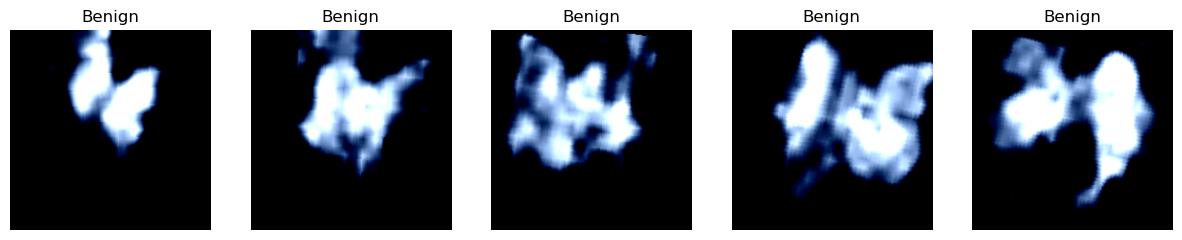

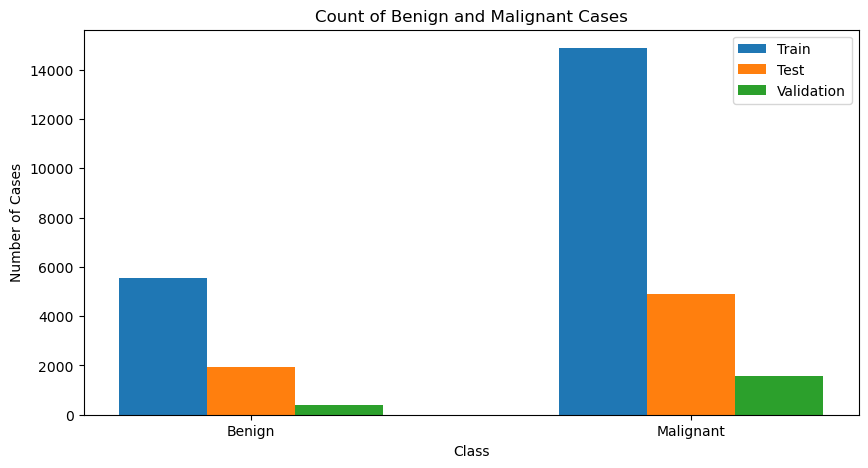

In [ ]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the dataset path
dataset_path = "clasification-roi"  # Update this to your dataset path

# Define transformations for training dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomCrop(210),  # Randomly crop images to 210x210
    transforms.RandomHorizontalFlip(),  # Horizontal flipping
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

# Define transformations for validation and test datasets
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])


valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])


train_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'train'), transform=train_transform)
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'test'), transform=test_transform)
valid_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'val'), transform=valid_transform)  # Assuming you have a 'valid' folder


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


benign_count_train = train_dataset.targets.count(0)  
malignant_count_train = train_dataset.targets.count(1)  
print(f'Train Set: Benign = {benign_count_train}, Malignant = {malignant_count_train}')

benign_count_test = test_dataset.targets.count(0)  
malignant_count_test = test_dataset.targets.count(1)  
print(f'Test Set: Benign = {benign_count_test}, Malignant = {malignant_count_test}')

benign_count_valid = valid_dataset.targets.count(0)  
malignant_count_valid = valid_dataset.targets.count(1)  
print(f'Validation Set: Benign = {benign_count_valid}, Malignant = {malignant_count_valid}')


def display_sample_images(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        image, label = dataset[i]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image.permute(1, 2, 0).numpy())  # Convert tensor to image format
        plt.title(dataset.classes[label])
        plt.axis('off')
    plt.show()


display_sample_images(train_dataset)


labels = ['Benign', 'Malignant']
train_counts = [benign_count_train, malignant_count_train]
test_counts = [benign_count_test, malignant_count_test]
valid_counts = [benign_count_valid, malignant_count_valid]

x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, train_counts, width=0.2, label='Train', align='center')
plt.bar([p + 0.2 for p in x], test_counts, width=0.2, label='Test', align='center')
plt.bar([p + 0.4 for p in x], valid_counts, width=0.2, label='Validation', align='center')

plt.xlabel('Class')
plt.ylabel('Number of Cases')
plt.title('Count of Benign and Malignant Cases')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
plt.show()

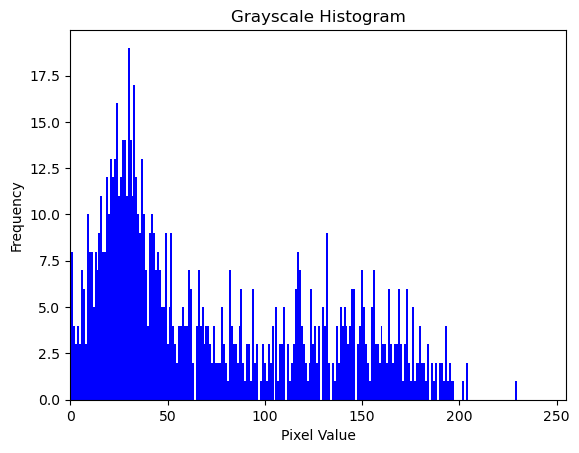

Most frequent pixel values and their frequencies:
Pixel Value: 30, Frequency: 19
Pixel Value: 33, Frequency: 17
Pixel Value: 24, Frequency: 16
Pixel Value: 27, Frequency: 14
Pixel Value: 31, Frequency: 14


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r'D:\Infosys\clasification-roi\train\Benign\BreaDM-Be-1801\SUB1\p-034.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate and flatten the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()

# Get the top 5 most frequent pixel values
top_n = 5
most_frequent_indices = np.argsort(hist)[-top_n:][::-1]

# Plot the histogram
plt.bar(range(256), hist, color='blue', width=1.0)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 255])
plt.show()

# Print the most frequent pixel values and their frequencies
print("Most frequent pixel values and their frequencies:")
for idx in most_frequent_indices:
    print(f"Pixel Value: {idx}, Frequency: {int(hist[idx])}")


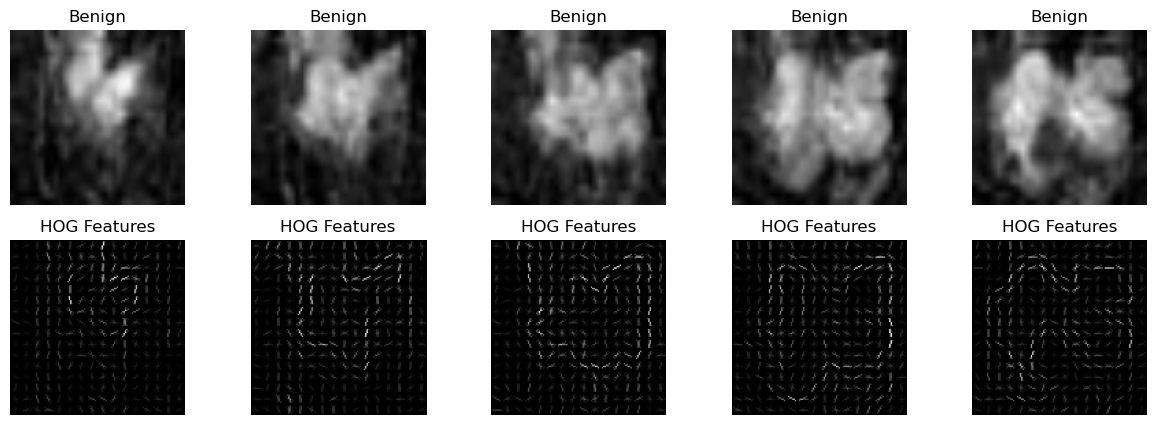

In [ ]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from skimage.feature import hog
from skimage import color
import matplotlib.pyplot as plt
import numpy as np

# Define the dataset path
dataset_path = "clasification-roi" # Update this to your dataset path

# Define transformations for training dataset (resize images, as HOG operates on fixed-size images)
resize_transform = transforms.Compose([
    transforms.Resize((128, 128)),  # HOG typically works well with smaller images
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'train'), transform=resize_transform)
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'test'), transform=resize_transform)
valid_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'val'), transform=resize_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# Function to extract HOG features from a dataset image
def extract_hog_features(image):
    image_np = image.permute(1, 2, 0).numpy()  # Convert tensor to NumPy array
    image_gray = color.rgb2gray(image_np)  # Convert RGB image to grayscale
    hog_features, hog_image = hog(image_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),block_norm='L2-Hys', visualize=True, feature_vector=True)
    return hog_features, hog_image

# Display HOG feature for a sample image
def display_hog_sample(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        image, label = dataset[i]
        hog_features, hog_image = extract_hog_features(image)
        plt.subplot(2, num_images, i + 1)
        plt.imshow(image.permute(1, 2, 0).numpy())  # Original image
        plt.title(dataset.classes[label])
        plt.axis('off')

        plt.subplot(2, num_images, i + num_images + 1)
        plt.imshow(hog_image, cmap='gray')  # HOG visualization
        plt.title('HOG Features')
        plt.axis('off')
    plt.show()

# Example of HOG features for training images
display_hog_sample(train_dataset)


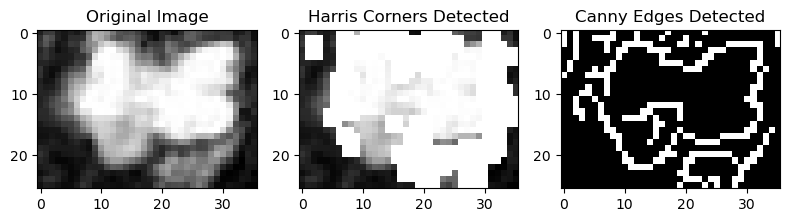

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image, block_size=2, ksize=3, k=0.04):
    """
    Function to detect corners using the Harris Corner Detection algorithm.
    """
    # Convert the image to float32 (required by the Harris function)
    gray_image = np.float32(image)

    # Apply Harris corner detection
    harris_response = cv2.cornerHarris(gray_image, block_size, ksize, k)

    # Dilate the corners to enhance visibility
    harris_response = cv2.dilate(harris_response, None)

    # Thresholding to mark the corners on the original image
    corners_image = image.copy()
    corners_image[harris_response > 0.01 * harris_response.max()] = 255

    return corners_image

def canny_edge_detection(image, lower_threshold=100, upper_threshold=200):
    """
    Function to apply Canny Edge Detection on an image.
    """
    # Apply Canny edge detection
    edges = cv2.Canny(image, lower_threshold, upper_threshold)
    return edges

# Load the input image (update file path as needed)
input_image_path = r'D:\Infosys\clasification-roi\train\Benign\BreaDM-Be-1801\SUB6\p-035.jpg'

# Read the image in grayscale
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image not found at path: {input_image_path}. Please check the file path.")

# Apply Harris corner detection
corners_image = harris_corner_detection(image)

# Apply Canny edge detection
edges_image = canny_edge_detection(image)

# Convert images for display in Jupyter Notebook
corners_image_rgb = cv2.cvtColor(corners_image, cv2.COLOR_GRAY2RGB)
edges_image_rgb = cv2.cvtColor(edges_image, cv2.COLOR_GRAY2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(corners_image_rgb)
plt.title('Harris Corners Detected')

plt.subplot(1, 3, 3)
plt.imshow(edges_image_rgb)
plt.title('Canny Edges Detected')

plt.tight_layout()
plt.show()


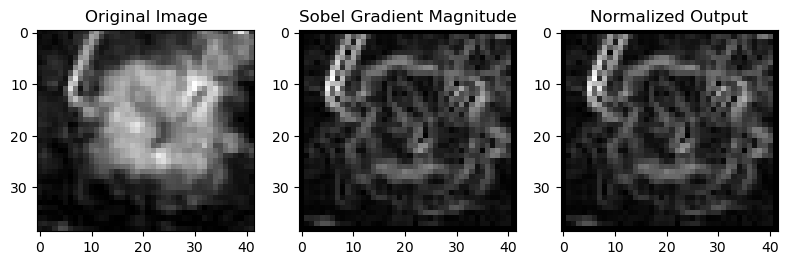

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],[0,  0,  0],[1,  2,  1]])

# Function to apply convolution between image and kernel
def apply_convolution(image, kernel):
    # Get image dimensions
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Output image (zero padded to keep the same size)
    output_image = np.zeros((height, width))

    # Apply convolution
    for i in range(1, height-1):
        for j in range(1, width-1):
            region = image[i-1:i+2, j-1:j+2]  # 3x3 region around the pixel
            output_image[i, j] = np.sum(region * kernel)

    return output_image

# Function to compute gradient magnitude from Sobel outputs
def compute_gradient_magnitude(sobel_x_output, sobel_y_output):
    return np.sqrt(sobel_x_output**2 + sobel_y_output**2)

# Function to normalize the image for display
def normalize_image(image):
    image_min = np.min(image)
    image_max = np.max(image)
    normalized_image = (image - image_min) / (image_max - image_min) * 255
    return normalized_image.astype(np.uint8)

# Load your image (replace 'your_image.jpg' with the path to your image file)
input_image_path = r'clasification-roi/train/Malignant/BreaDM-Ma-1802/SUB1/p-035.jpg'

image = Image.open(input_image_path).convert('L')  # Convert to grayscale

# Convert the image to a NumPy array
image_array = np.array(image)

# Apply Sobel operators
sobel_x_output = apply_convolution(image_array, sobel_x)
sobel_y_output = apply_convolution(image_array, sobel_y)

# Calculate gradient magnitude (Sobel magnitude)
sobel_magnitude = compute_gradient_magnitude(sobel_x_output, sobel_y_output)

# Normalize the output image for better visualization
normalized_output = normalize_image(sobel_magnitude)

# Display the results
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Gradient Magnitude')

plt.subplot(1, 3, 3)
plt.imshow(normalized_output, cmap='gray')
plt.title('Normalized Output')

plt.tight_layout()
plt.show()


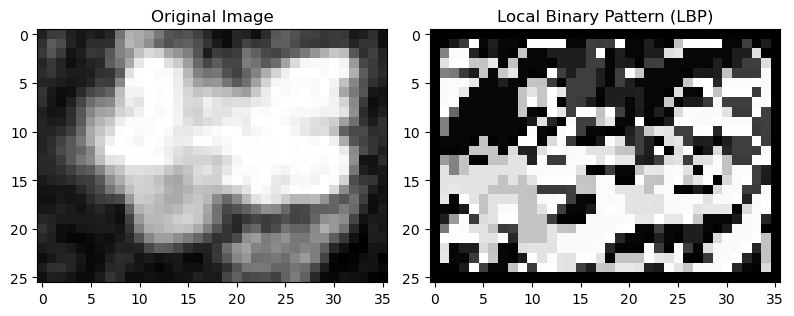

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def local_binary_pattern(image, radius=1, neighbors=8):
    # Get image dimensions
    height, width = image.shape

    # Initialize the LBP image
    lbp_image = np.zeros((height, width), dtype=np.uint8)

    # Define the angle step based on the number of neighbors
    angle_step = 2 * np.pi / neighbors

    # Calculate the LBP
    for i in range(radius, height - radius):
        for j in range(radius, width - radius):
            center_pixel = image[i, j]
            lbp_code = 0

            for n in range(neighbors):
                # Calculate the coordinates of the neighbor
                y = int(i + radius * np.sin(n * angle_step))
                x = int(j + radius * np.cos(n * angle_step))
                
                # Update the LBP code
                if image[y, x] >= center_pixel:
                    lbp_code |= 1 << n

            # Set the LBP value in the output image
            lbp_image[i, j] = lbp_code

    return lbp_image

# Load the input image (correct the file path)
input_image_path = r'D:\Infosys\clasification-roi\train\Benign\BreaDM-Be-1801\SUB6\p-035.jpg'  # Use raw string notation
# Read the image in grayscale
image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image not found at path: {input_image_path}. Please check the file path.")

# Calculate the LBP
lbp_image = local_binary_pattern(image)

# Display the original and LBP images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title('Local Binary Pattern (LBP)')

plt.tight_layout()
plt.show()


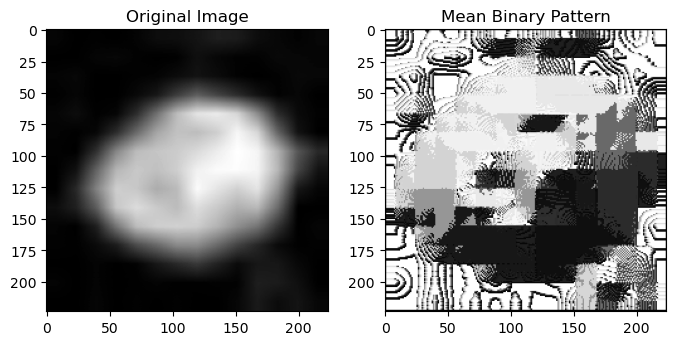

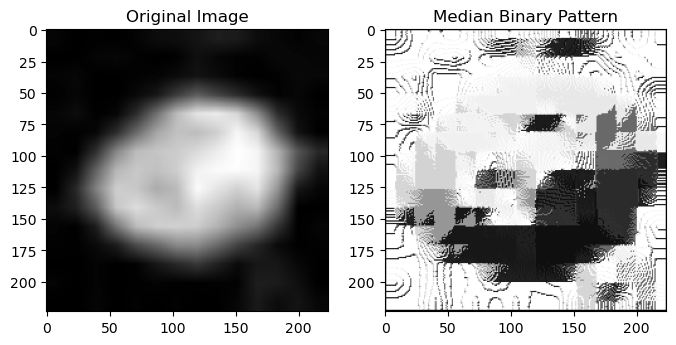

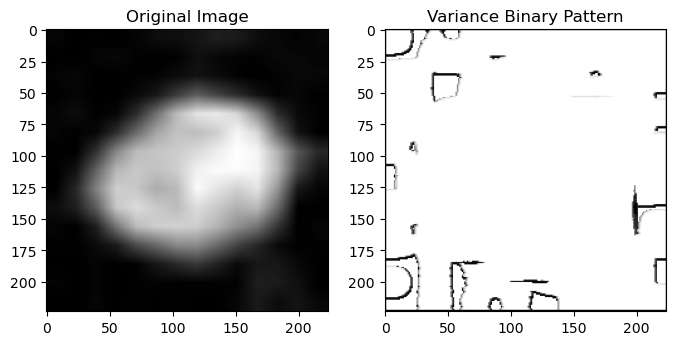

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def binary_pattern(image_path, method='mean'):
    try:
        # Load the image in grayscale
        img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img_array is None:
            raise FileNotFoundError(f"Image at {image_path} not found.")
        
        img_array = cv2.resize(img_array, (224, 224))

        # Get the dimensions of the image
        rows, cols = img_array.shape

        # Initialize the output image
        bp_image = np.zeros((rows, cols), dtype=np.uint8)

        # Loop over the image, skipping the border pixels
        for i in range(1, rows - 1):
            for j in range(1, cols - 1):
                # Extract the 3x3 neighborhood
                surr = img_array[i-1:i+2, j-1:j+2]

                # Calculate the reference value based on the selected method
                if method == 'mean':
                    ref_val = np.mean(surr)
                elif method == 'median':
                    ref_val = np.median(surr)
                elif method == 'variance':
                    ref_val = np.var(surr)
                else:
                    raise ValueError("Invalid method! Use 'mean', 'median', or 'variance'.")

                # Initialize the binary pattern
                binary_pattern = 0

                # Create the binary pattern by comparing neighbors to the reference value
                for ind, (dy, dx) in enumerate([(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]):
                    if surr[1 + dy, 1 + dx] >= ref_val:
                        binary_pattern += 2 ** ind

                # Set the binary pattern value for the current pixel
                bp_image[i, j] = binary_pattern

        # Normalize the output image for display
        bp_image_normalized = cv2.normalize(bp_image, None, 0, 255, cv2.NORM_MINMAX)

        # Display the original and binary pattern images
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img_array, cmap='gray')
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(bp_image_normalized, cmap='gray')
        plt.title(f'{method.capitalize()} Binary Pattern')

        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
image_path = './clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-019.jpg'
binary_pattern(image_path, method='mean')     # For Mean Binary Pattern
binary_pattern(image_path, method='median')   # For Median Binary Pattern
binary_pattern(image_path, method='variance') # For Variance Binary Pattern


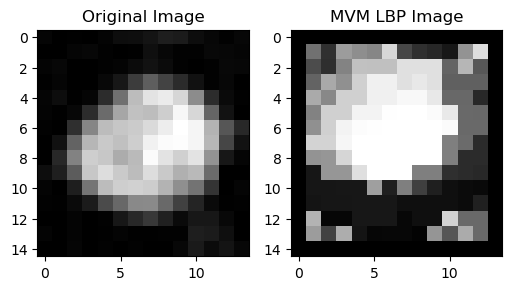

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mvm_lbp(gray_image):
    # Get the dimensions of the image
    rows, cols = gray_image.shape

    # Initialize the output LBP image
    imgLBP = np.zeros((rows, cols), dtype=np.uint8)

    # Loop over the image, skipping the border pixels
    for ih in range(1, rows - 1):
        for iw in range(1, cols - 1):
            # Step 1: Get the 3x3 neighborhood around the pixel
            img = gray_image[ih-1:ih+2, iw-1:iw+2]

            # Step 2: Calculate Mean, Variance, and Median of the neighborhood
            mean_value = np.mean(img)
            variance_value = np.var(img)
            median_value = np.median(img)

            # Step 3: Calculate MVM threshold
            mvm_threshold = (mean_value + np.sqrt(variance_value) + median_value) / 3

            # Step 4: Create a binary pattern by thresholding with MVM threshold
            img01 = (img >= mvm_threshold).astype(int)

            # Step 5: Flatten the matrix into a vector (excluding the center)
            img01_vector = np.delete(img01.flatten(), 4)

            # Step 6: Convert the binary pattern to a decimal number
            num = np.dot(img01_vector, 2 ** np.arange(8))

            # Step 7: Assign this number to the LBP image
            imgLBP[ih, iw] = num

    return imgLBP

# Example usage
image_path = './clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-019.jpg'  # Replace with your image path
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
lbp_image = mvm_lbp(gray_image)

# Display the original and LBP images
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title('MVM LBP Image')

plt.show()


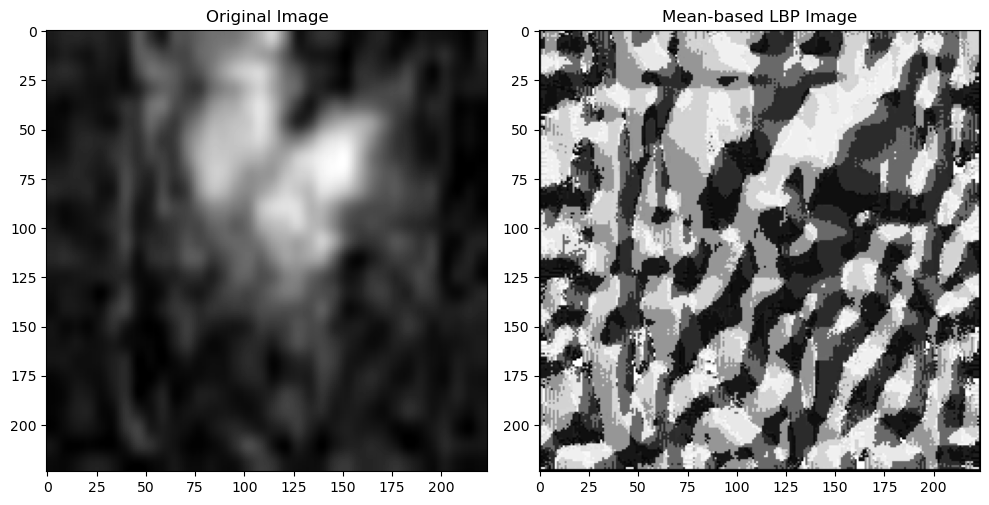

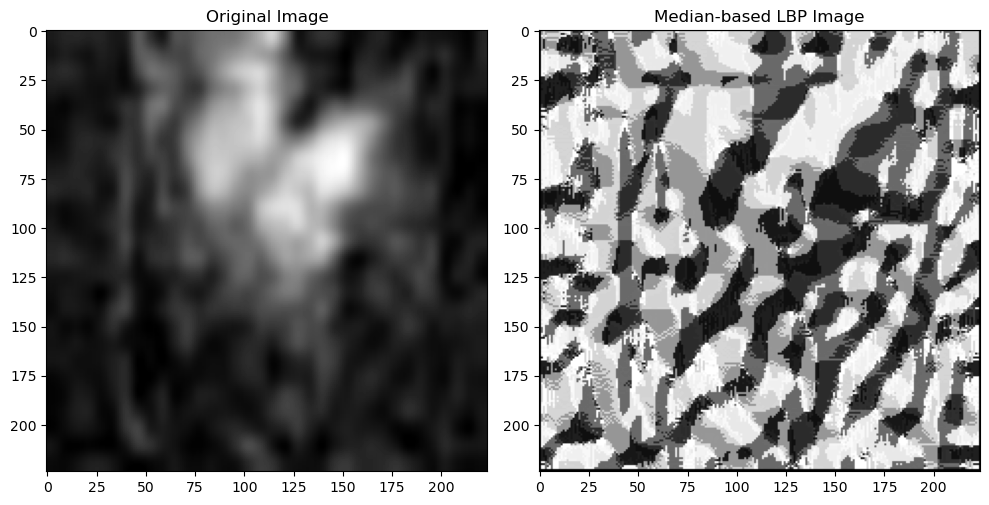

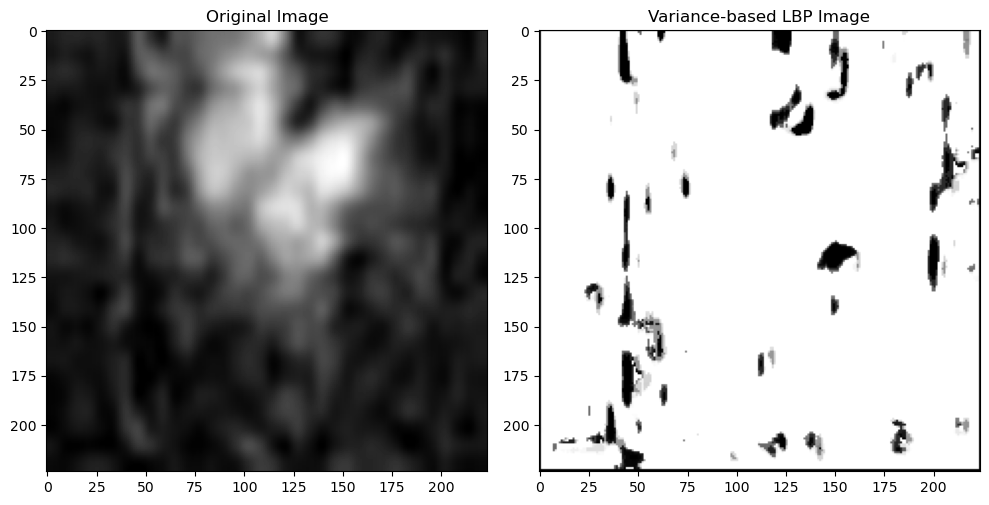

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Mean-based LBP calculation
def mean_based_lbp(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            mean_value = np.mean(neighborhood)
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= mean_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()

    return lbp_image

# Median-based LBP calculation
def median_based_lbp(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            median_value = np.median(neighborhood)
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= median_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()

    return lbp_image

# Variance-based LBP calculation
def variance_based_lbp(image_path):
    image = Image.open(image_path).convert('L').resize((224, 224))
    img_array = np.array(image)
    rows, cols = img_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = img_array[i-1:i+2, j-1:j+2]
            variance_value = np.var(neighborhood)
            surrounding_pixels = np.delete(neighborhood.flatten(), 4)
            binary_pattern = (surrounding_pixels >= variance_value).astype(int)
            lbp_image[i, j] = (binary_pattern * (2 ** np.arange(8))).sum()

    return lbp_image

# Display function to visualize the results
def display_results(original_image, lbp_image, title):
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Load and process image for each LBP method
image_path = r'clasification-roi\train\Benign\BreaDM-Be-1801\SUB1\p-032.jpg'  # Replace with your actual image path
original_image = Image.open(image_path).convert('L').resize((224, 224))
original_image_array = np.array(original_image)

# Mean-based LBP
mean_lbp_image = mean_based_lbp(image_path)
display_results(original_image_array, mean_lbp_image, 'Mean-based LBP Image')

# Median-based LBP
median_lbp_image = median_based_lbp(image_path)
display_results(original_image_array, median_lbp_image, 'Median-based LBP Image')

# Variance-based LBP
variance_lbp_image = variance_based_lbp(image_path)
display_results(original_image_array, variance_lbp_image, 'Variance-based LBP Image')


In [ ]:
import numpy as np

def horizontal_GLCM(input_matrix):
    num_gray_levels = input_matrix.max() + 1  # Determine the number of gray levels in the matrix
    glcm = np.zeros((num_gray_levels, num_gray_levels), dtype=int)

    # Loop through the matrix and count co-occurrences of horizontally adjacent pixels
    for i in range(input_matrix.shape[0]):
        for j in range(input_matrix.shape[1] - 1):
            row_value = input_matrix[i, j]
            col_value = input_matrix[i, j + 1]
            glcm[row_value, col_value] += 1  # Increment the count for the (row_value, col_value) pair

    return glcm

# Define the input matrix
input_matrix = np.array([
    [0, 1, 2, 3],
    [1, 0, 3, 2],
    [2, 3, 0, 1],
    [3, 2, 1, 0]
])

# Calculate the horizontal GLCM
glcm_result = horizontal_GLCM(input_matrix)

# Print the result
print("Horizontal GLCM:")
print(glcm_result)


Horizontal GLCM:
[[0 2 0 1]
 [2 0 1 0]
 [0 1 0 2]
 [1 0 2 0]]


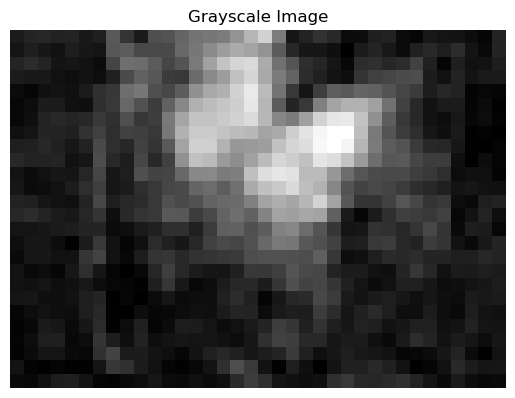

Horizontal GLCM:
[[0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def horizontal_GLCM(input_matrix):
    num_gray_levels = input_matrix.max() + 1  # Determine the number of gray levels in the matrix
    glcm = np.zeros((num_gray_levels, num_gray_levels), dtype=int)

    # Loop through the matrix and count co-occurrences of horizontally adjacent pixels
    for i in range(input_matrix.shape[0]):
        for j in range(input_matrix.shape[1] - 1):
            row_value = input_matrix[i, j]
            col_value = input_matrix[i, j + 1]
            glcm[row_value, col_value] += 1  # Increment the count for the (row_value, col_value) pair

    return glcm

def load_image_to_matrix(image_path):
    # Load image and convert to grayscale
    image = Image.open(image_path).convert('L')
    input_matrix = np.array(image)
    return input_matrix

# Path to the image file
image_path = r'D:\Infosys\clasification-roi\train\Benign\BreaDM-Be-1801\SUB1\p-032.jpg'  # Replace with your actual image path

# Convert image to grayscale matrix
input_matrix = load_image_to_matrix(image_path)

# Calculate the horizontal GLCM
glcm_result = horizontal_GLCM(input_matrix)

# Display the grayscale image
plt.imshow(input_matrix, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Print the GLCM result
print("Horizontal GLCM:")
print(glcm_result)


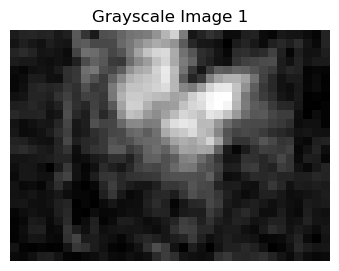

Horizontal GLCM for Image 1:
[[0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]




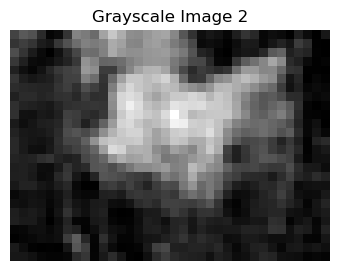

Horizontal GLCM for Image 2:
[[0 3 0 ... 0 0 0]
 [3 1 1 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




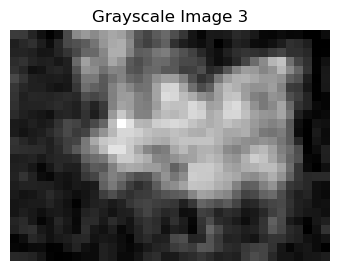

Horizontal GLCM for Image 3:
[[2 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




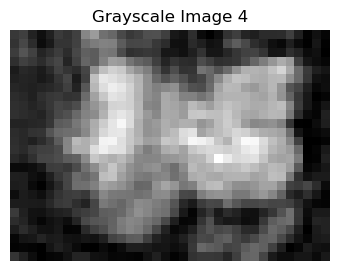

Horizontal GLCM for Image 4:
[[1 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




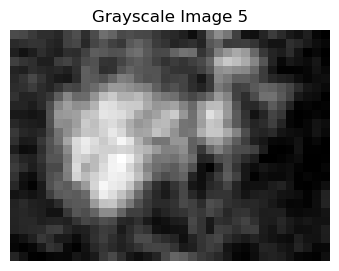

Horizontal GLCM for Image 5:
[[3 1 2 ... 0 0 0]
 [4 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def horizontal_GLCM(input_matrix):
    num_gray_levels = input_matrix.max() + 1  # Determine the number of gray levels in the matrix
    glcm = np.zeros((num_gray_levels, num_gray_levels), dtype=int)

    # Loop through the matrix and count co-occurrences of horizontally adjacent pixels
    for i in range(input_matrix.shape[0]):
        for j in range(input_matrix.shape[1] - 1):
            row_value = input_matrix[i, j]
            col_value = input_matrix[i, j + 1]
            glcm[row_value, col_value] += 1  # Increment the count for the (row_value, col_value) pair

    return glcm

def load_image_to_matrix(image_path):
    # Load image and convert to grayscale
    image = Image.open(image_path).convert('L')
    input_matrix = np.array(image)
    return input_matrix

# List of paths to the image files
image_paths = [
    r'clasification-roi\train\Benign\BreaDM-Be-1801\SUB1\p-032.jpg',
    r'clasification-roi\train\Benign\BreaDM-Be-1801\SUB1\p-033.jpg',
    r'clasification-roi\train\Benign\BreaDM-Be-1801\SUB1\p-034.jpg',
    r'clasification-roi\train\Benign\BreaDM-Be-1801\SUB1\p-035.jpg',
    r'clasification-roi\train\Benign\BreaDM-Be-1801\SUB1\p-038.jpg'
]


# Loop through each image path, process it, and display results
for idx, image_path in enumerate(image_paths):
    # Convert image to grayscale matrix
    input_matrix = load_image_to_matrix(image_path)

    # Calculate the horizontal GLCM
    glcm_result = horizontal_GLCM(input_matrix)

    # Display the grayscale image
    plt.figure(figsize=(6, 3))
    plt.imshow(input_matrix, cmap='gray')
    plt.title(f"Grayscale Image {idx + 1}")
    plt.axis('off')
    plt.show()

    # Print the GLCM result
    print(f"Horizontal GLCM for Image {idx + 1}:")
    print(glcm_result)
    print("\n" + "="*40 + "\n")


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import zipfile
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Custom VGG16 class inheriting from nn.Module
class CustomVGG16(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomVGG16, self).__init__()
        
        # Load the pre-trained VGG16 model
        vgg16 = models.vgg16(weights="IMAGENET1K_V1")  # Updated for newer PyTorch versions
        
        # Extract the features and avgpool layers from the pre-trained model
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        
        # Define a new classifier with Sequential layers
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),   # Adjust input size to 512*7*7 for VGG16
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)     # Set output to num_classes (e.g., 2 for binary)
        )

    def forward(self, x):
        # Pass input through the features layer
        x = self.features(x)
        
        # Apply the avgpool layer
        x = self.avgpool(x)
        
        # Flatten the output to a 2D tensor
        x = torch.flatten(x, 1)
        
        # Pass through the custom classifier
        x = self.classifier(x)
        
        return x

# Test the model setup in Colab
if __name__ == "__main__":
    # Instantiate the model with desired number of classes
    model = CustomVGG16(num_classes=2)
    
    # Print the model structure
    print(model)
    
    # Check if CUDA is available and move the model to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Dummy input to test the forward pass
    dummy_input = torch.randn(1, 3, 224, 224).to(device)  # 1 sample, 3 channels, 224x224 image
    output = model(dummy_input)
    print("Output shape:", output.shape)
    
    # Define loss and optimizer for training
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


CustomVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, di

In [4]:
import numpy as np
import torch

class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):

        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss

        # Initialize best_score if not set, and check for improvement
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                self.trace_func(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """Saves model when validation loss decreases."""
        if self.verbose:
            self.trace_func(f"Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...")
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


In [5]:
import torch
import torch.nn.functional as F
from tqdm import tqdm
import torch.optim as optim
from torchvision import models  # Example for model import

# Initialize model
model = models.vgg16(pretrained=True)  # Replace with your model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Define the L2 regularization parameter
l2_decay = 0.01

def train(epoch, model, loader, num_epochs):
    # Initialize the optimizer with weight decay
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=l2_decay)
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    
    model.train()
    
    correct = 0
    for data, label in tqdm(loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        data = data.float().cuda()
        label = label.long().cuda()
        
        output = model(data)
        optimizer.zero_grad()
        loss = F.nll_loss(F.log_softmax(output, dim=1), label)
        loss.backward()
        optimizer.step()
        
        pred = output.data.max(1)[1]
        correct += pred.eq(label.data.view_as(pred)).cpu().sum()
    
    print(f'train accuracy: {100. * correct / len(loader.dataset)}%')


In [7]:
# please make sure you are using variables that match your own environment.

# model training
import torch
import torch.nn.functional as F
from tqdm import tqdm
import torch.optim as optim
from torchvision import models  # Example for model import

# Initialize model
model = models.vgg16(pretrained=True)  # Replace with your model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model Training
model.to(device)  # here device is cuda
best_accuracy = 0
early_stop = EarlyStopping(patience=20, verbose=True)

project_name = 'tumor_classification'
model_name = 'vgg16'

# We will be using epochs. Epochs will be defined in another code block.
for epoch in range(1, total_epochs + 1):
    train(epoch, model)

    with torch.no_grad():
        _, test_loss, auc = val(model)

    # Making sure that the model can run on multiple GPUs
    state_dict = model.module.state_dict() if isinstance(model, nn.parallel.DistributedDataParallel) else model.state_dict()
    
    model_save_dir = os.path.join('model', project_name, model_name)
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)

    early_stop(test_loss, model)

    if auc > best_accuracy:
        best_accuracy = auc
        torch.save(state_dict, os.path.join(model_save_dir, f'{model_name}_{epoch}.pth'), _use_new_zipfile_serialization=False)

    if early_stop.early_stop:
        print("Early stopping")
        break


NameError: name 'total_epochs' is not defined

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc
import torch
import torch.nn.functional as F
import numpy as np

# Set device to CPU
device = torch.device("cpu")

def validation(model, val_loader):
    name = 'validation'
    len_val_dataloader = len(val_loader.dataset)
    model.eval()  # Set model to evaluation mode
    test_loss = 0
    correct = 0
    all_predictions = []  # Collect predictions
    possibilities = None  # Store probabilities for AUC

    for data, target in val_loader:
        # Move data and target to CPU
        data, target = data.to(device), target.to(device)

        val_output = model(data)

        # Calculate test loss
        test_loss += F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()

        # Get predictions
        pred = val_output.data.max(1)[1]
        all_predictions.append(pred.cpu().numpy())  # Collect predictions

        # Calculate probabilities for AUC
        possibility = F.softmax(val_output, dim=1).cpu().detach().numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)

        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    # Flatten predictions
    all_predictions = [i for item in all_predictions for i in item]

    # Confusion matrix
    cm = metrics.confusion_matrix(target.cpu().numpy(), all_predictions)

    # One-hot encode the labels for AUC computation
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(target.cpu().numpy()).astype(int).tolist()]

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = auc(fpr, tpr)

    # Test loss
    test_loss /= len_val_dataloader  # Average loss per sample

    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(1 - fpr[0], tpr[0], auc_value))
    print('\nTest set: Average loss: {:.4f}, Accuracy: {:.2f}%\n'.format(test_loss, 100. * correct / len_val_dataloader))

    return test_loss, 100. * correct / len_val_dataloader, test_loss, auc_value


In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

def test(model):
    name = 'test'  # change name to test
    len_test_dataloader = len(test_dataloader.dataset)  # change to testing dataloader
    model.eval()
    test_loss = 0
    correct = 0
    possibilities = None
    all_predictions = []
    labels = ['benign', 'malignant']  # add labels

    for data, target in val_dataloader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        test_output = model(data)  # changing variable name to test_output
        test_loss += F.nll_loss(F.log_softmax(test_output, dim=1), target, reduction='sum').item()  # changing variable name

        pred = val_output.data.max(1)[1]
        all_predictions.append(pred.cpu().numpy())

        possibility = F.softmax(val_output, dim=1).cpu().data.numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)

        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    all_predictions = [i for item in all_predictions for i in item]

    print(metrics.classification_report(label, pred_all, labels=range(2), target_names=label_names, digits=4))
    # confusion matrix - add labels = range(2) argument
    cm = metrics.confusion_matrix(label, pred_all, labels=range(2))

    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(label).astype(int).tolist()]

    fpr, tpr, thresholds = roc_curve(label_onehot.ravel(), possibilitys.ravel())
    auc_value = auc(fpr, tpr)

    test_loss /= len_test_dataloader
    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(1 - fpr[0], tpr[0], auc_value))
    print('\n{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        name, test_loss, correct, len_test_dataloader, 100. * correct / len_test_dataloader))

    return 100. * correct / len_test_dataloader, test_loss, auc_value
